# Machine Learning - classical approach (Variational Classifier example)

* General description of SVC method: https://scikit-learn.org/1.6/modules/svm.html#svm-classification
* Seaborn library: https://seaborn.pydata.org/examples/index.html

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Let's get and see the data...

In [2]:
iris_data = load_iris()

In [3]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
features = iris_data.data
features = MinMaxScaler().fit_transform(features) #Normalization of features to [0,1]

labels = iris_data.target

In [5]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

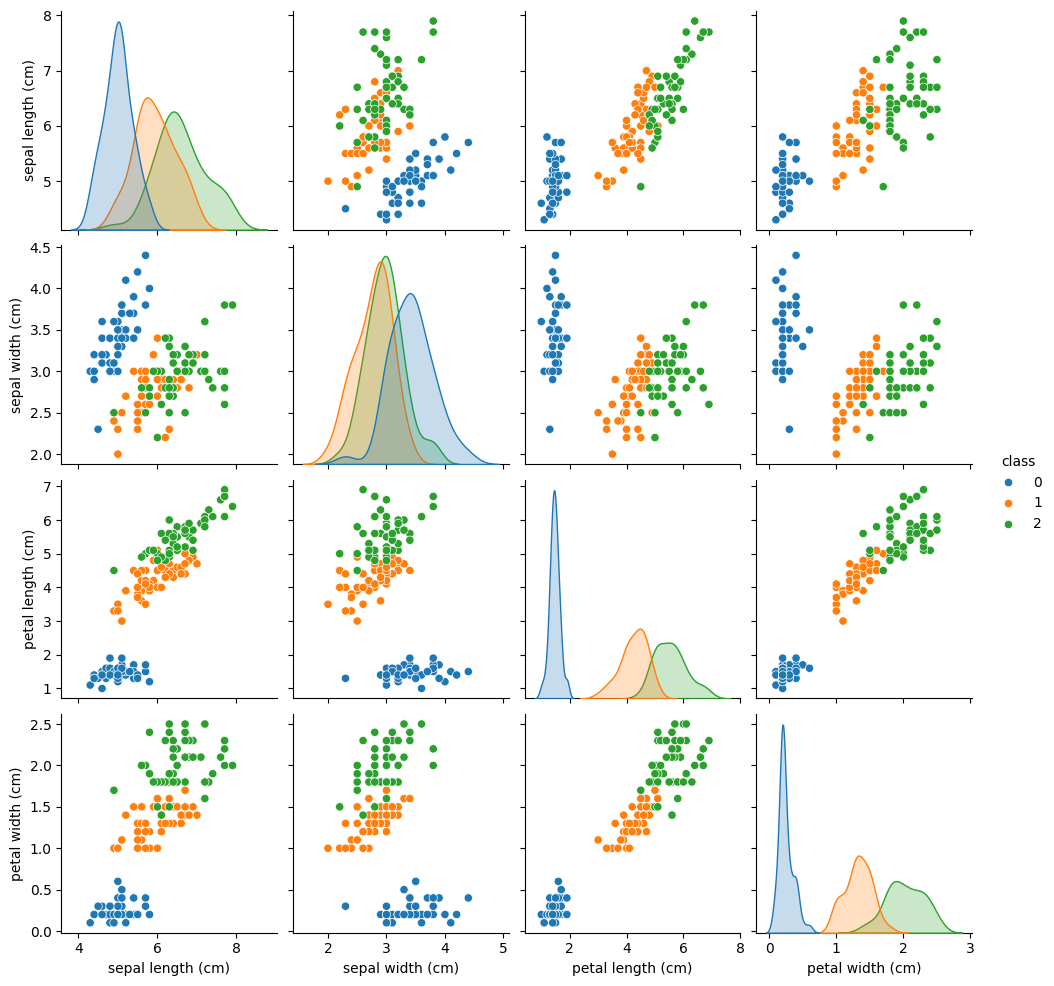

In [6]:
sns.pairplot(df, hue="class", palette="tab10")

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Classical classifier:

In [9]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=123
)

svc = SVC()
svc.fit(train_features, train_labels)

SVC()

In [10]:
train_score = svc.score(train_features, train_labels)
test_score = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score:.2f}")
print(f"Classical SVC on the test dataset:     {test_score:.2f}")

Classical SVC on the training dataset: 0.99
Classical SVC on the test dataset:     0.97


In [11]:
print(svc.predict([[4.5, 3.05, 1.6, 0.1]]))

[2]


## Exercise 1:
Use the same method to create machine learning model predicting Italian wine cultivator based on chamical properties using classical wine dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine